## Import Libraries. Load Dataset.

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [98]:
arena = pd.read_csv("C:\\Users\\chris\\Documents\\Datasets\\WOW\\arena_clean.csv")
arena = arena[(arena["teamName"] == "DylanManderFanClub")]
arena.head()

,index,isRanked,startTime,zoneId,duration,teamName,teamPlayerName1,teamPlayerName2,teamPlayerName3,teamPlayerName4,...,teamClassIcon1,teamClassIcon2,teamClassIcon3,teamClassIcon4,teamClassIcon5,enemyTeamClassIcon1,enemyTeamClassIcon2,enemyTeamClassIcon3,enemyTeamClassIcon4,enemyTeamClassIcon5
0,0,YES,2022-01-28-14:27,Ruins of Lordaeron,275.0,DylanManderFanClub,Sundodger,Priestmode,NaN,NaN,...,https://www.progamerreview.com/wp-content/uplo...,https://www.progamerreview.com/wp-content/uplo...,NaN,NaN,NaN,https://www.progamerreview.com/wp-content/uplo...,https://www.progamerreview.com/wp-content/uplo...,NaN,NaN,NaN
1,1,YES,2022-01-28-14:31,Ruins of Lordaeron,244.0,DylanManderFanClub,Sundodger,Priestmode,NaN,NaN,...,https://www.progamerreview.com/wp-content/uplo...,https://www.progamerreview.com/wp-content/uplo...,NaN,NaN,NaN,https://www.progamerreview.com/wp-content/uplo...,https://www.progamerreview.com/wp-content/uplo...,NaN,NaN,NaN
2,2,YES,2022-01-28-14:35,Nagrand Arena,139.0,DylanManderFanClub,Sundodger,Priestmode,NaN,NaN,...,https://www.progamerreview.com/wp-content/uplo...,https://www.progamerreview.com/wp-content/uplo...,NaN,NaN,NaN,https://www.progamerreview.com/wp-content/uplo...,https://www.progamerreview.com/wp-content/uplo...,NaN,NaN,NaN
3,3,YES,2022-01-28-14:38,Ruins of Lordaeron,250.0,DylanManderFanClub,Sundodger,Priestmode,NaN,NaN,...,https://www.progamerreview.com/wp-content/uplo...,https://www.progamerreview.com/wp-content/uplo...,NaN,NaN,NaN,https://www.progamerreview.com/wp-content/uplo...,https://www.progamerreview.com/wp-content/uplo...,NaN,NaN,NaN
4,4,YES,2022-01-28-14:42,Ruins of Lordaeron,145.0,DylanManderFanClub,Sundodger,Priestmode,NaN,NaN,...,https://www.progamerreview.com/wp-content/uplo...,https://www.progamerreview.com/wp-content/uplo...,NaN,NaN,NaN,https://www.progamerreview.com/wp-content/uplo...,https://www.progamerreview.com/wp-content/uplo...,NaN,NaN,NaN


## Exclude outliers. Calculate mean match duration.

In [99]:
arena_hist = arena[(arena["duration"] < 1200)]

In [100]:
dur_avg = arena.duration.mean()
dur_avg = int(dur_avg.round())

## Create Histogram of Match Durations.

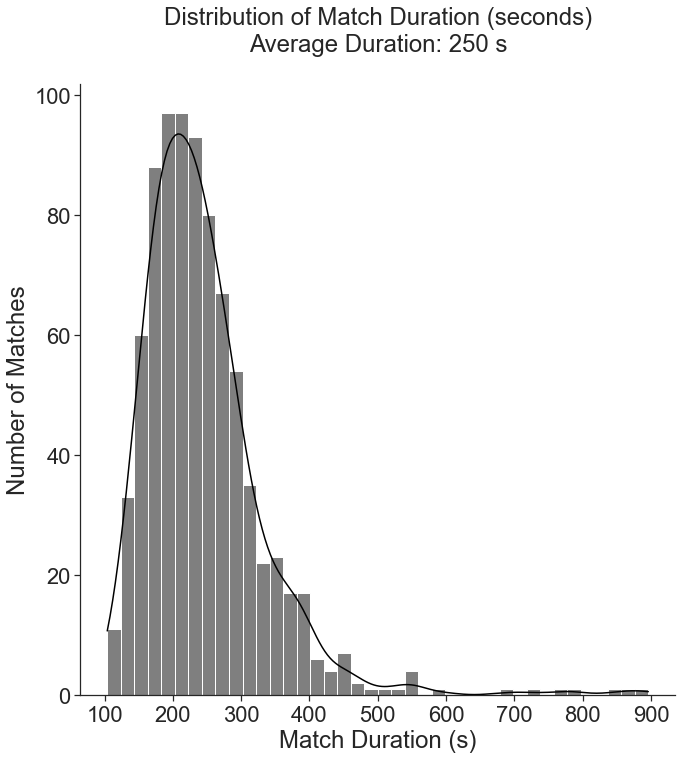

In [101]:
sns.set(font_scale = 2)
sns.set_style("ticks")

hist = sns.displot(arena_hist["duration"], kde=True, height=10, color="black")
hist.set(xlabel="Match Duration (s)", 
         ylabel="Number of Matches", 
         title=f"Distribution of Match Duration (seconds)\nAverage Duration: {dur_avg} s\n")

In [102]:
hist.savefig("arena-s3-match-duration-histogram.png")

## Calculate four most common matchups.

In [103]:
arena_common = arena[(arena["duration"] < 500)]

In [104]:
common_matchups = arena_common.groupby(["enemyTeamComp"]).size().sort_values(ascending=False).nlargest(n=4).index.tolist()
common_matchups

['PRIEST-ROGUE', 'DRUID-WARRIOR', 'MAGE-ROGUE', 'DRUID-ROGUE']

In [105]:
arena_common = arena_common[(arena_common["enemyTeamComp"].isin(common_matchups))]

## Create Stacked KDE Plots.

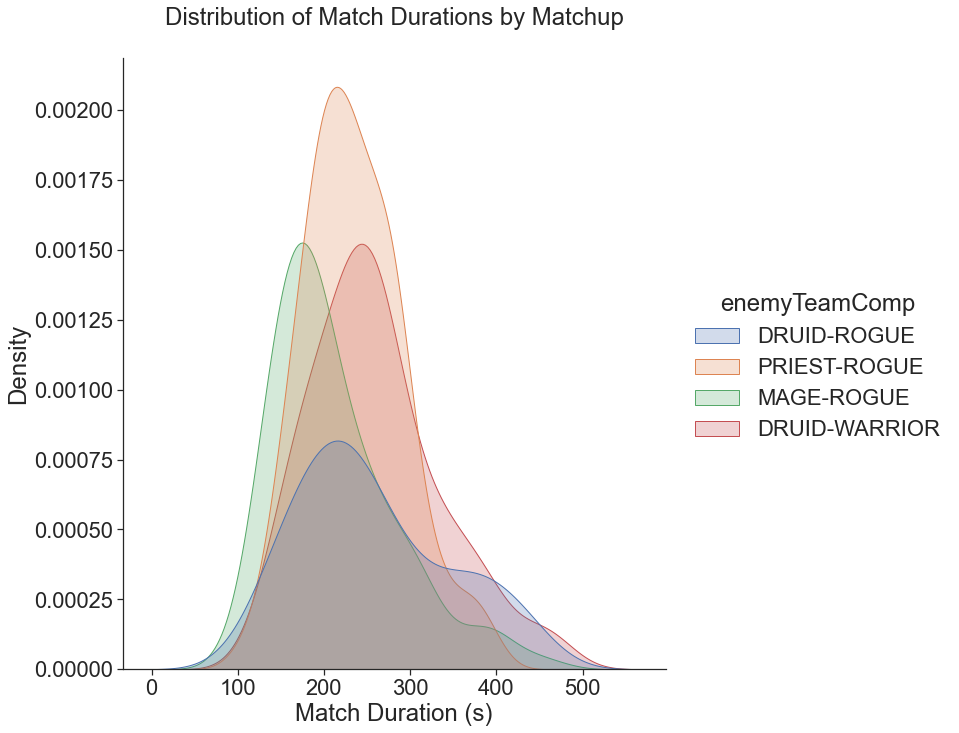

In [106]:
sns.set(font_scale = 2)
sns.set_style("ticks")

c_hist = sns.displot(arena_common,
                     x="duration",
                     hue="enemyTeamComp",
                     kind="kde",
                     fill=True,
                     multiple="layer",
                     height=10)

c_hist.set(xlabel="Match Duration (s)",
           ylabel="Density",
           title=f"Distribution of Match Durations by Matchup\n")

In [107]:
c_hist.savefig("arena-s3-match-duration-kde-layer.png")

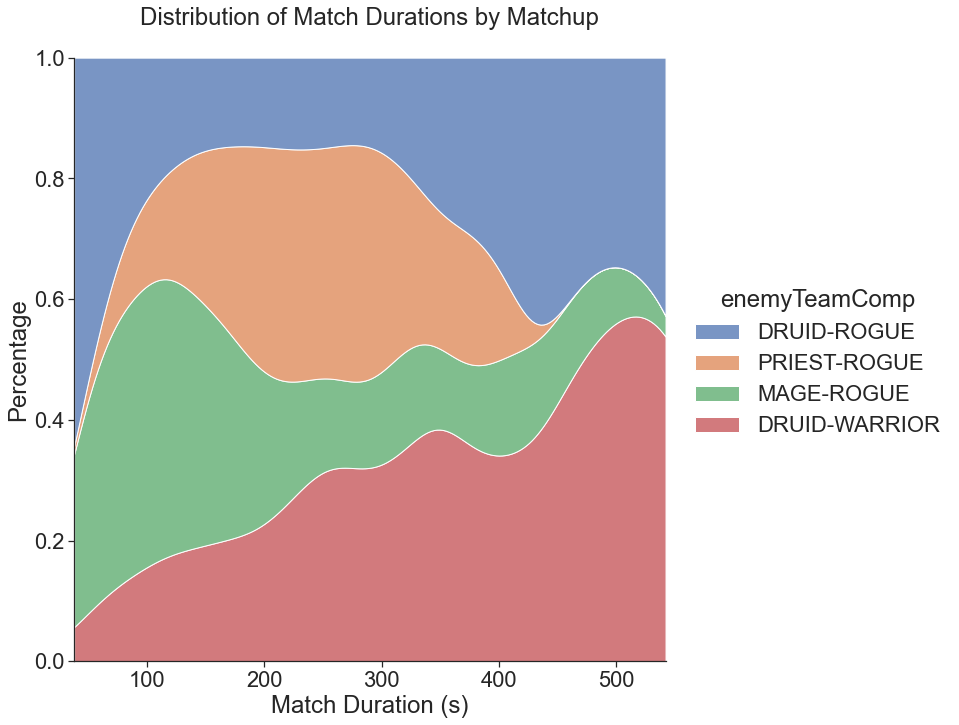

In [108]:
sns.set(font_scale = 2)
sns.set_style("ticks")

c_hist = sns.displot(arena_common,
                     x="duration",
                     hue="enemyTeamComp",
                     kind="kde",
                     color="black",
                     multiple="fill",
                     height=10)

c_hist.set(xlabel="Match Duration (s)",
           ylabel="Percentage",
           title=f"Distribution of Match Durations by Matchup\n")

In [109]:
c_hist.savefig("arena-s3-match-duration-kde-fill.png")

## Create Linear Regression Plot, Match Duration vs. Win/Loss.

In [110]:
arena_binom = arena[(arena["enemyTeamComp"] == "MAGE-ROGUE") & (arena["duration"] < 600)]

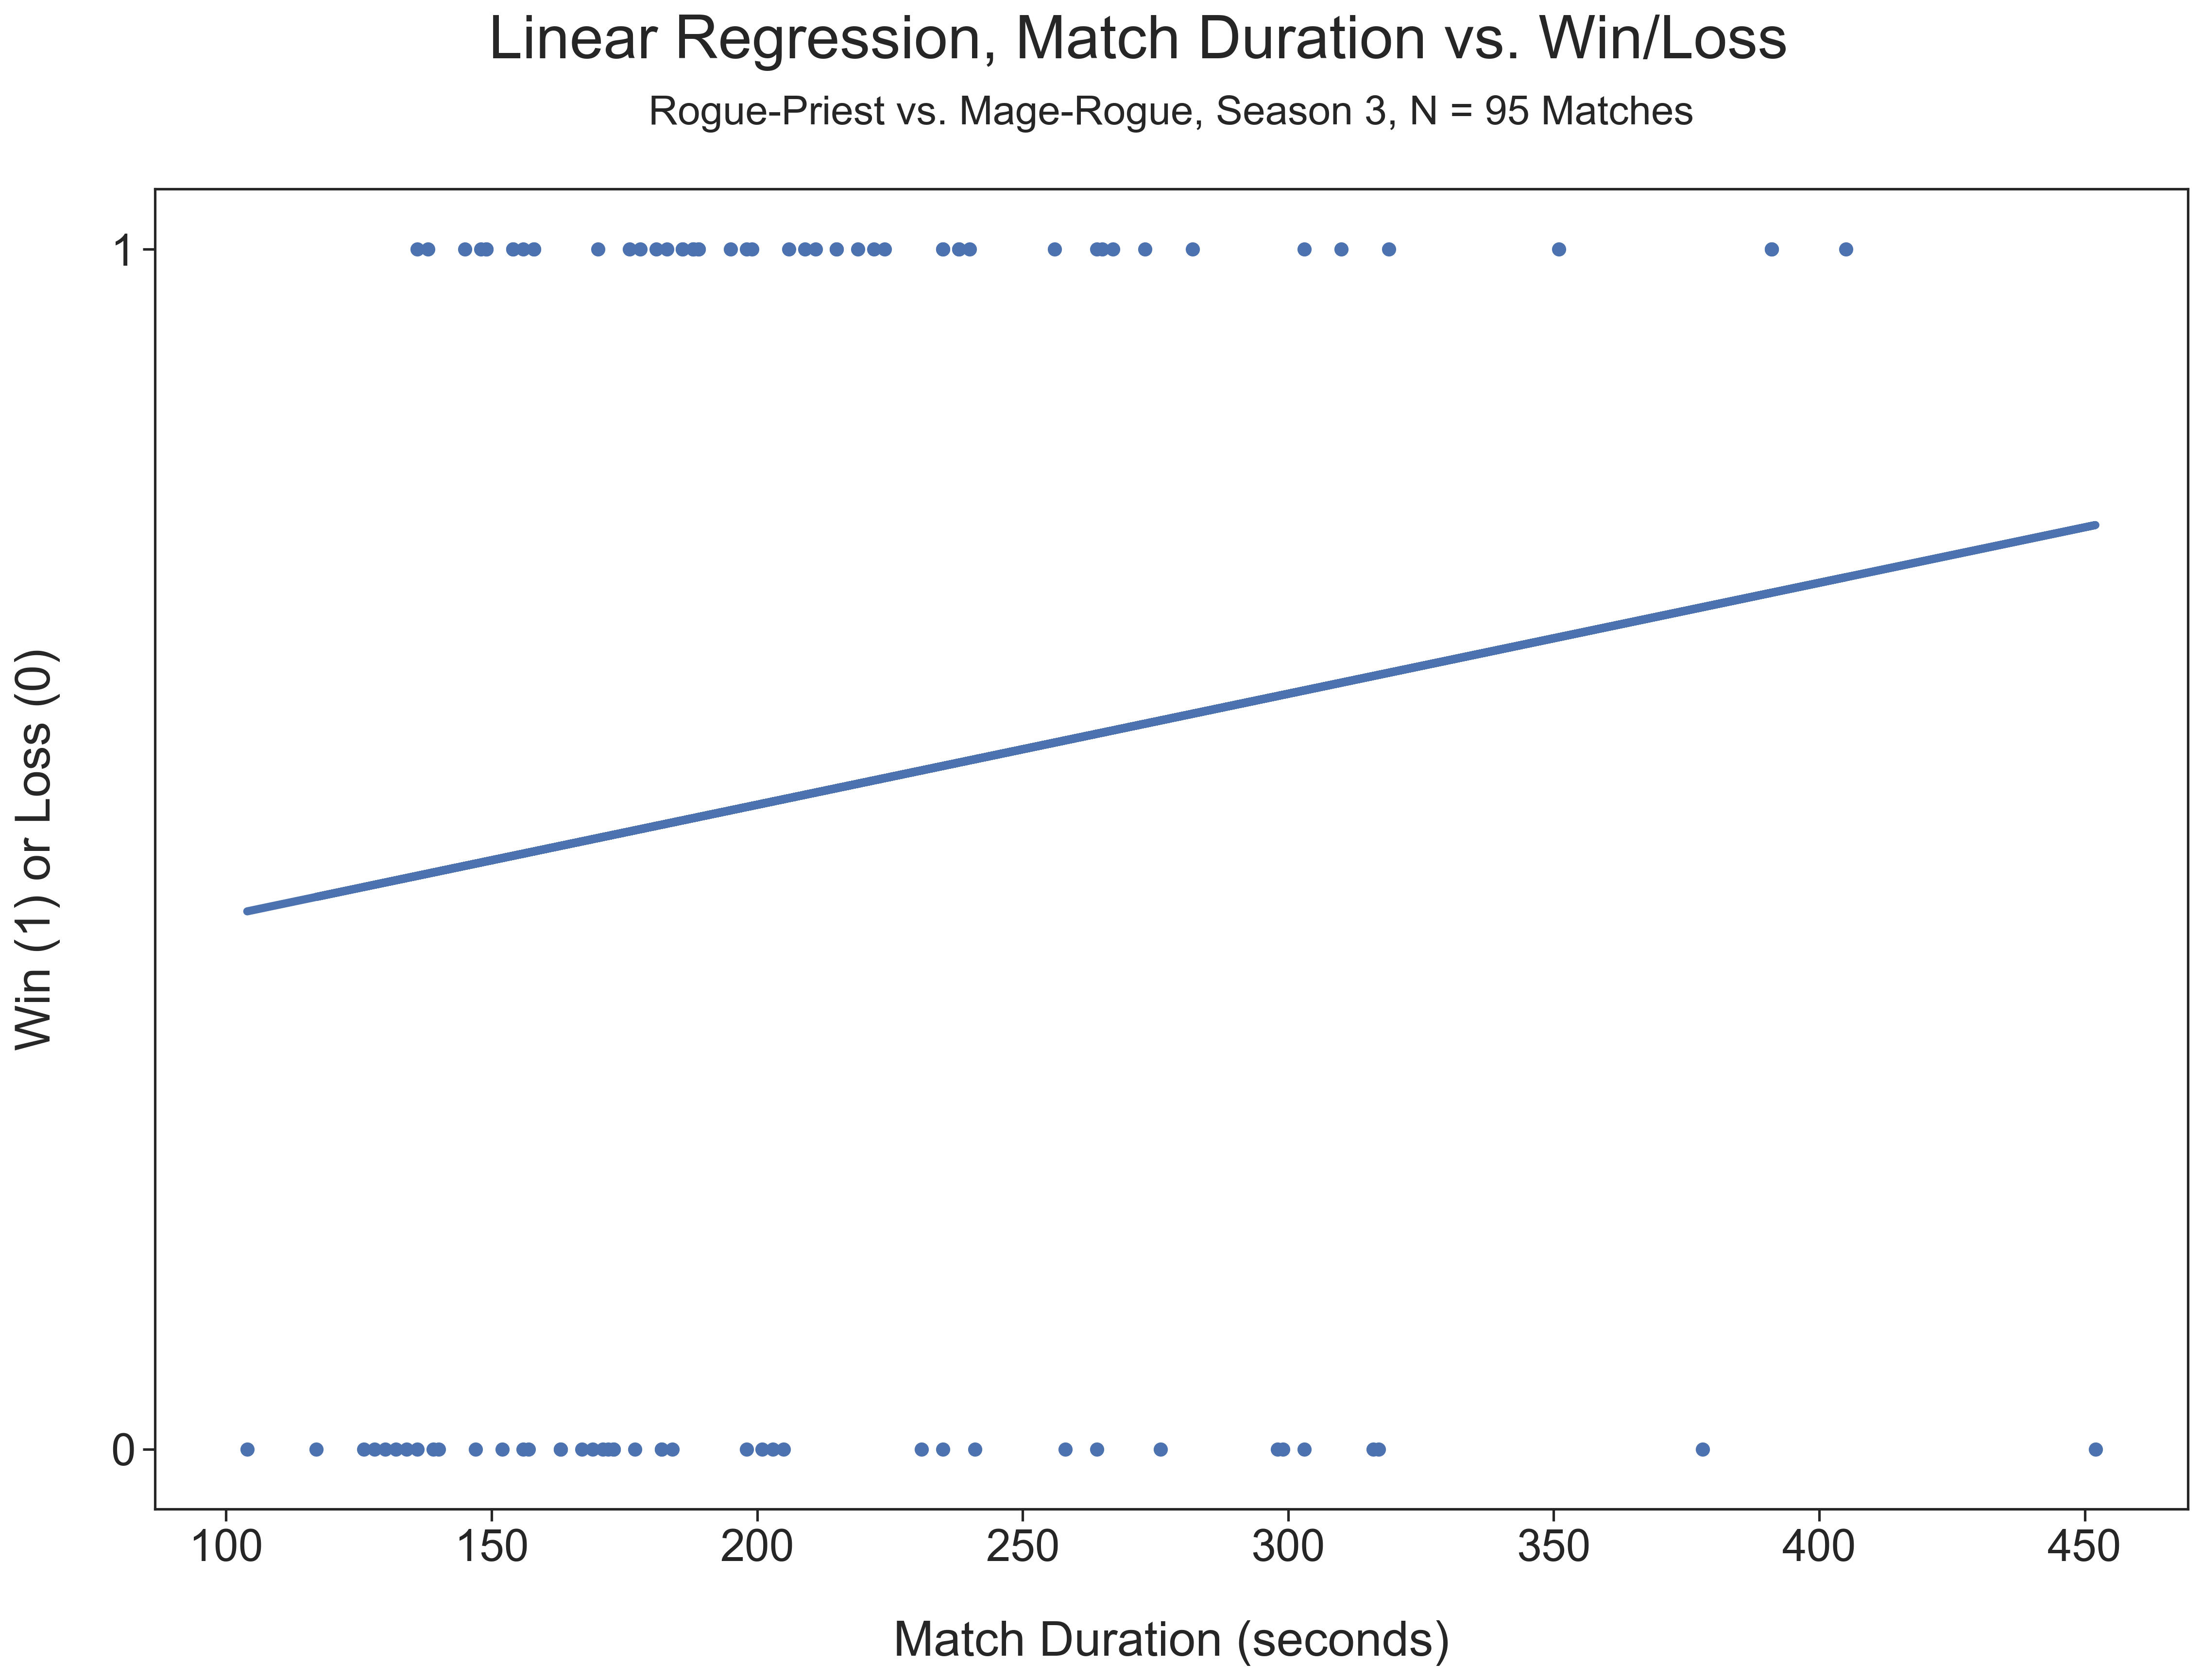

In [111]:
reg = np.polyfit(arena_binom["duration"], arena_binom["winLoss"], deg=1)
trend = np.polyval(reg, arena_binom["duration"])

plt.figure(figsize=(18,12), dpi=300)

plt.scatter(x=arena_binom["duration"], y=arena_binom["winLoss"])
plt.plot(arena_binom["duration"], trend, linewidth=4)

plt.suptitle("Linear Regression, Match Duration vs. Win/Loss", fontsize=30)
plt.title(f"Rogue-Priest vs. Mage-Rogue, Season 3, N = {arena_binom.shape[0]} Matches", y=1.04, fontsize=20)

plt.xlabel("Match Duration (seconds)", labelpad=25)
plt.ylabel("Win (1) or Loss (0)", labelpad=25)

plt.yticks([0, 1])
plt.savefig("arena-s3-match-duration-regression.png")